In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import u

# Data Generation

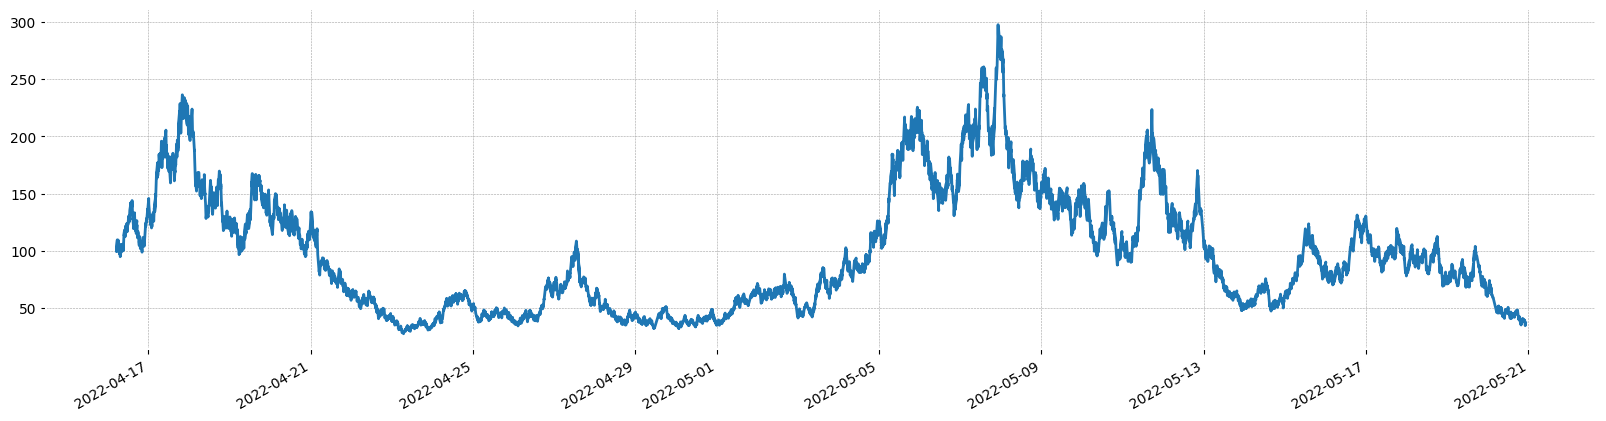

<AxesSubplot:>

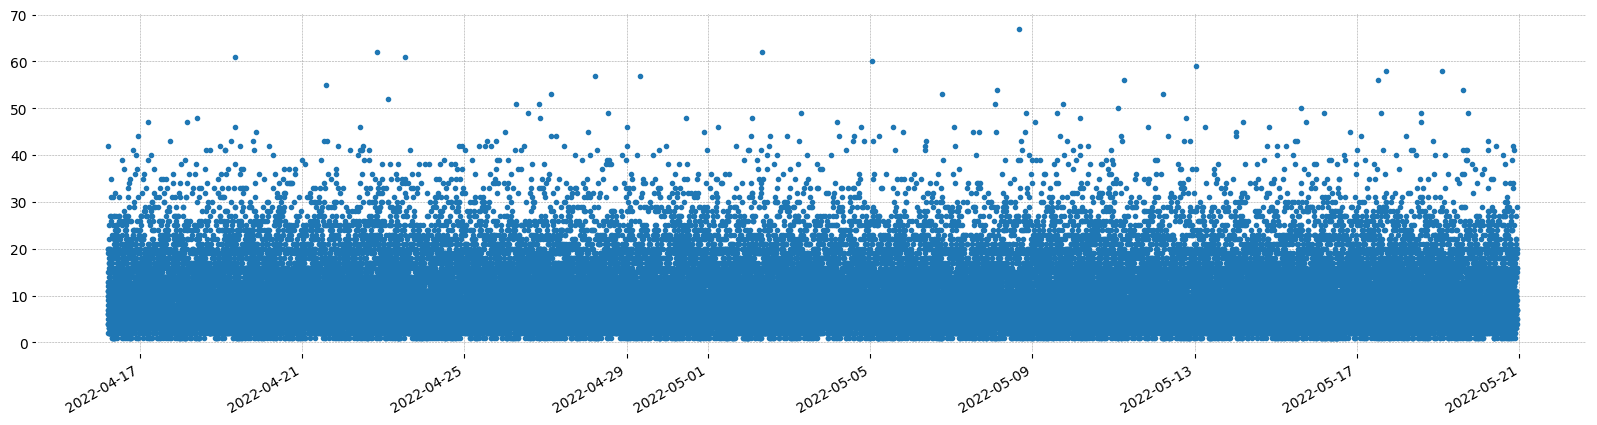

In [57]:
plt.rcParams["figure.figsize"] = (20, 5)

data = u.create_price_data(theta=0.0001, start_price=100, n_samples=50000)
data = u.add_volume_data(data, mu=10, var=50)
data = u.add_dir_data(data)

data["close"].plot.line()
plt.show()
data["volume"].plot(style=".")

# Tick Imbalance Bars

In [66]:
tick_imbalance_bars = bars.create_tick_imbalance_bars(
    data, expected_length=10, min_observation_weight=0.1, max_length=120
)
tick_imbalance_bars.head(8)

,volume,open,close,high,low
index,,,,,
2022-04-16 05:08:58.547137,119.0,100.00,103.21,103.21,99.55
2022-04-16 05:19:58.547137,130.0,102.10,105.51,105.51,100.77
2022-04-16 05:31:58.547137,44.0,106.19,109.70,109.70,106.19
2022-04-16 05:35:58.547137,568.0,108.81,99.37,109.50,99.37
2022-04-16 06:34:58.547137,680.0,100.69,100.82,106.01,94.94
2022-04-16 07:36:58.547137,1159.0,100.45,114.47,116.17,99.66
2022-04-16 09:36:58.547137,1288.0,115.35,122.46,124.06,112.40
2022-04-16 11:36:58.547137,876.0,121.58,138.60,138.60,120.43


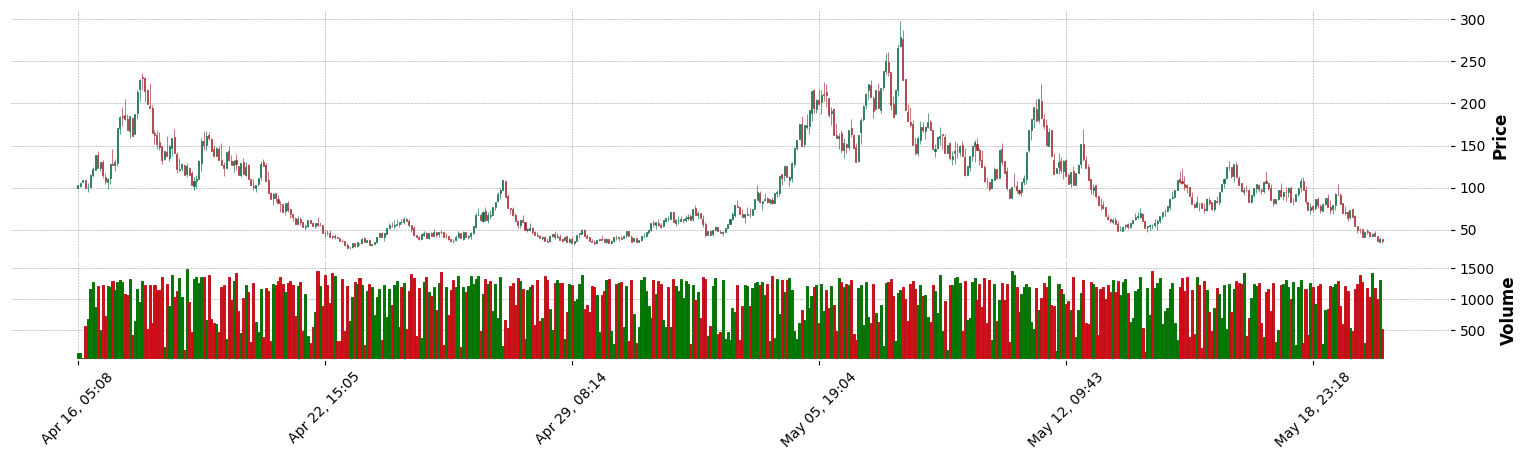

In [67]:
mplf.plot(
    tick_imbalance_bars, type="candle", style="charles", figsize=(20, 5), volume=True
)

# Volume Imbalance Bars

In [72]:
data["dv"] = data["close"] * data["volume"]

In [69]:
mean_hourly_volume = np.mean(data.resample("H")["volume"].sum())
mean_hourly_volume

629.1091127098322

In [74]:
volume_imbalance_bars = bars.create_volume_imbalance_bars(
    data,
    expected_length=10,
    min_observation_weight=0.1,
    expected_abs_inbalance=mean_hourly_volume / 5,
    max_length=120,
)
volume_imbalance_bars.head(8)

,volume,open,close,high,low,dv
index,,,,,,
2022-04-16 05:08:58.547137,1261.0,100.00,98.46,109.70,96.72,130394.21
2022-04-16 07:08:58.547137,1127.0,98.76,100.16,105.99,94.94,114669.68
2022-04-16 09:08:58.547137,460.0,101.14,117.63,117.63,101.14,51121.55
2022-04-16 09:49:58.547137,1271.0,118.27,122.45,124.06,112.40,151052.79
2022-04-16 11:49:58.547137,1203.0,122.51,134.21,142.21,121.96,157452.85
2022-04-16 13:49:58.547137,1284.0,134.64,130.41,144.02,119.41,167811.89
2022-04-16 15:49:58.547137,1245.0,130.45,111.84,130.45,111.52,149393.44
2022-04-16 17:49:58.547137,786.0,112.94,105.23,116.86,104.75,85961.54


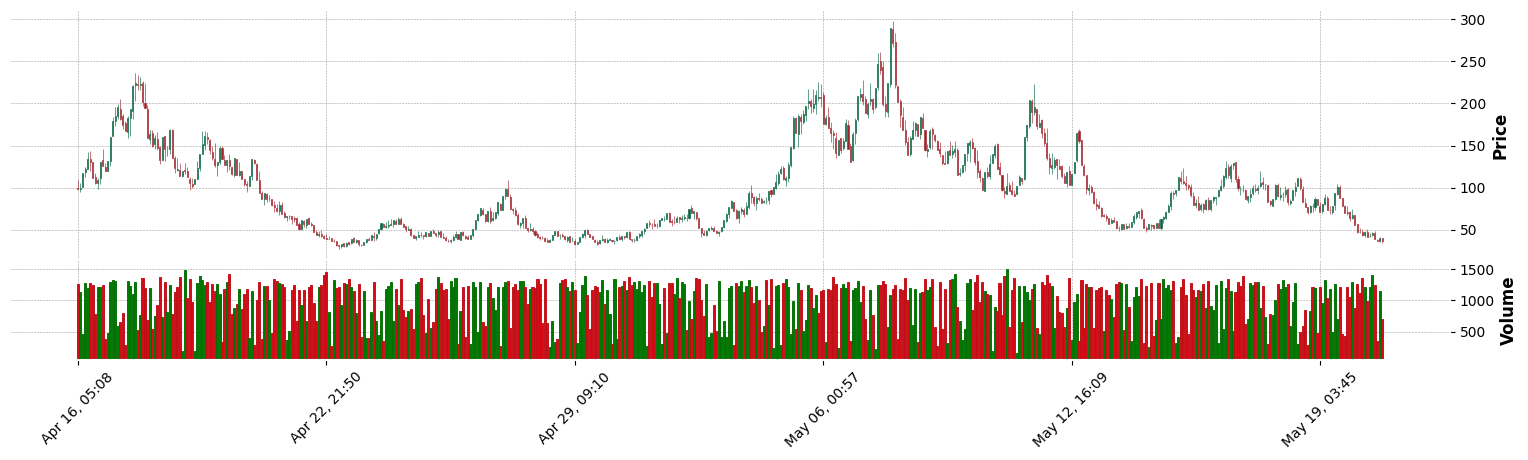

In [75]:
mplf.plot(
    volume_imbalance_bars, type="candle", style="charles", figsize=(20, 5), volume=True
)

# Dollar Imbalance Bars

In [76]:
mean_hourly_dv = np.mean(data.resample("H")["dv"].sum())
mean_hourly_dv

60763.87318944844

In [78]:
dv_imbalance_bars = bars.create_dollar_volume_imbalance_bars(
    data,
    expected_length=10,
    min_observation_weight=0.1,
    expected_abs_inbalance=mean_hourly_dv / 5,
    max_length=120,
)
dv_imbalance_bars.head(8)

,volume,open,close,high,low,dv
index,,,,,,
2022-04-16 05:08:58.547137,1261.0,100.00,98.46,109.70,96.72,130394.21
2022-04-16 07:08:58.547137,1127.0,98.76,100.16,105.99,94.94,114669.68
2022-04-16 09:08:58.547137,420.0,101.14,117.08,117.08,101.14,46432.77
2022-04-16 09:45:58.547137,1288.0,116.42,123.42,124.06,112.40,152936.05
2022-04-16 11:45:58.547137,749.0,121.79,135.52,135.52,121.42,95169.00
2022-04-16 12:59:58.547137,1231.0,137.18,122.82,144.02,122.82,166922.36
2022-04-16 14:59:58.547137,486.0,123.06,130.35,130.84,119.41,60189.01
2022-04-16 15:43:58.547137,1233.0,130.68,116.00,133.36,111.52,148832.35


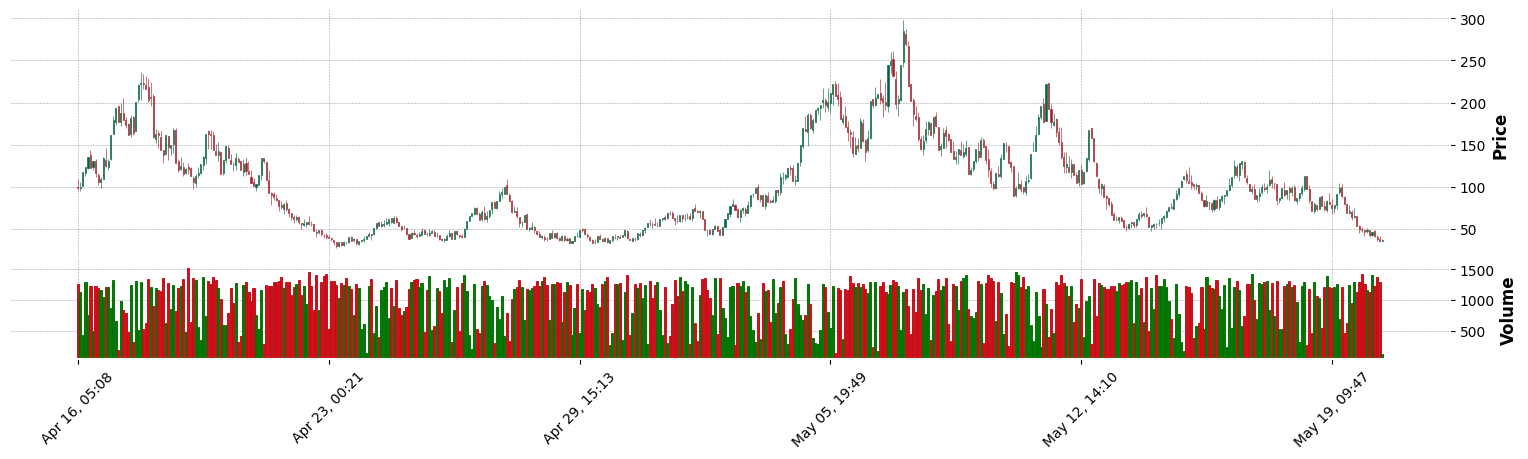

In [79]:
mplf.plot(
    dv_imbalance_bars, type="candle", style="charles", figsize=(20, 5), volume=True
)